In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [5]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [10]:
df.drop(106,axis=0,inplace=True)

In [11]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [13]:
df.columns = ['Month','Sales']

In [14]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [15]:
df['Month'] = pd.to_datetime(df['Month'])

In [16]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [17]:
df.set_index('Month',inplace=True)

In [18]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [19]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


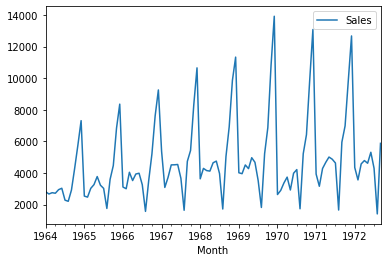

In [20]:
df.plot()

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

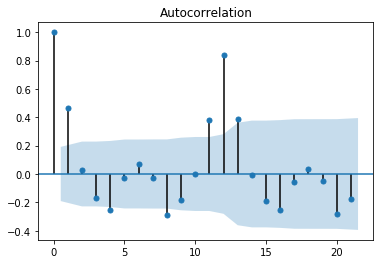

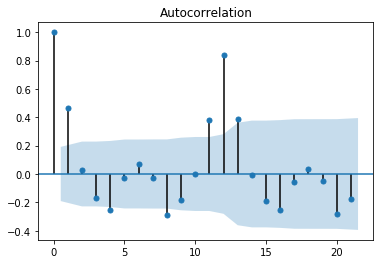

In [22]:
plot_acf(df)

In [23]:
df_diff = df.diff(periods=1)

In [24]:
df_diff.head()

,Sales
Month,
1964-01-01,NaN
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0


In [25]:
df_diff = df_diff[1:]

In [26]:
df_diff.head()

,Sales
Month,
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0
1964-06-01,90.0


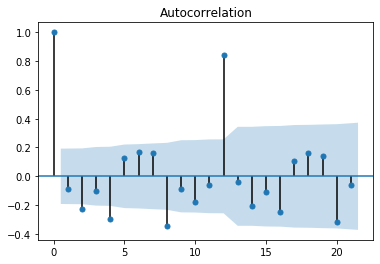

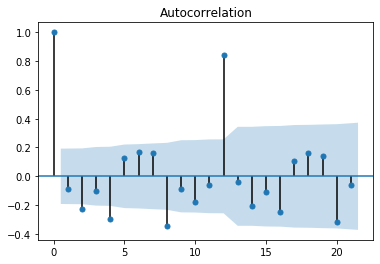

In [27]:
plot_acf(df_diff)

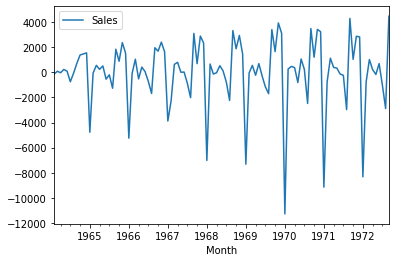

In [28]:
df_diff.plot()

In [29]:
X = df.values

In [35]:
train = X[:79]
test = X[79:]

In [36]:
train.size

79

In [37]:
test.size

26

In [33]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
model_arima = ARIMA(train,order=(9,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

F:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
F:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


1407.44698495521


F:\Anaconda\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
F:\Anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [40]:
predictions = model_arima_fit.forecast(steps=26)[0]

In [41]:
predictions

array([ 2131.75665641,  8858.67290873, 12156.28903464, 10432.83003691,
        9187.13025916,  5793.54607395,  3038.44764505,  2492.74623056,
        4772.39922866,  4162.61040758,  2507.32633541,  4445.85779713,
        6251.47345105,  9105.8074149 , 11939.96481593, 11393.55660623,
        7938.1561015 ,  4908.40256216,  4196.50634924,  3652.77038863,
        3872.89035082,  4273.46268533,  3752.19887365,  4852.40839706,
        7976.85011646, 10927.06912748])

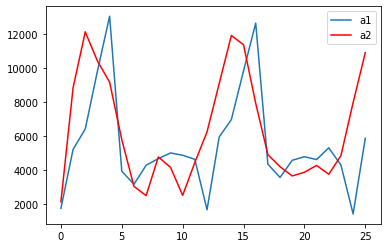

In [42]:
plt.plot(test,label='a1')
plt.plot(predictions,'r',label='a2')
plt.legend()

In [43]:
import itertools
p=d=q=range(0,5)
pdq = itertools.product(p,d,q)

In [44]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=(param))
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1455.9772031858956
(0, 0, 1) 1432.3632397943102
(0, 0, 2) 1434.2251121007864
(0, 0, 3) 1434.3641988457039
(0, 0, 4) 1430.792396327441
(0, 1, 0) 1439.8404351499316
(0, 1, 1) 1441.271428229581
(0, 1, 2) 1417.0690742947136
(0, 1, 3) 1419.0539401332253
(0, 1, 4) 1420.1777627898489
(0, 2, 0) 1480.3115146796524
(0, 2, 1) 1428.755287968133
(0, 2, 2) 1430.4158556389082
(0, 2, 3) 1409.4470662350814
(0, 2, 4) 1411.4226277475598
(1, 0, 0) 1436.5382287637735
(1, 0, 1) 1434.1271754325533
(1, 1, 0) 1441.558469516831
(1, 1, 1) 1422.029740549532
(1, 1, 2) 1419.046477663581
(1, 1, 3) 1420.2657219407677
(1, 2, 0) 1467.5072052754178
(2, 0, 0) 1433.0121327425582
(2, 0, 1) 1433.8516560667153
(2, 0, 3) 1421.326405039681
(2, 0, 4) 1422.3121095211523
(2, 1, 0) 1439.2657043019506
(2, 1, 1) 1417.126696727464
(2, 2, 0) 1459.0222556565784
(3, 0, 0) 1434.1542143443007
(3, 0, 1) 1439.6457431239048
(3, 1, 0) 1438.6706860121435
(3, 1, 1) 1417.0499250120833
(3, 1, 2) 1405.501156577516
(3, 1, 3) 1406.24618861

In [45]:
import statsmodels.api as sm

In [46]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(9,1,1),seasonal_order=(9,1,1,12))
result = model.fit()

In [49]:
df['forecast'] = result.predict(start=79,end=105,dynamic=True)

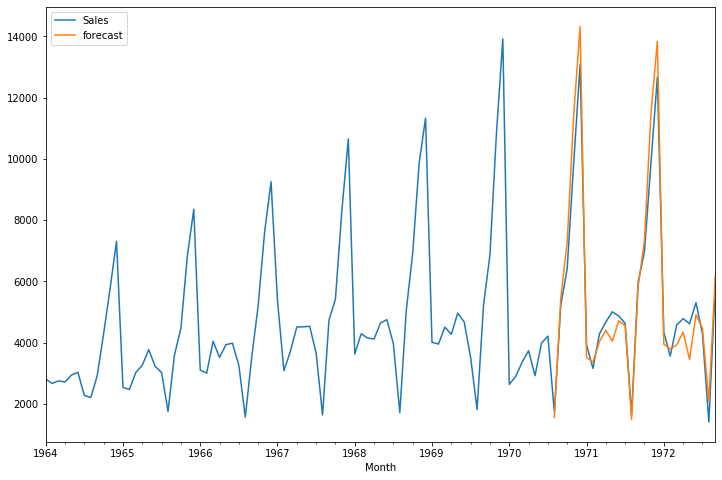

In [50]:
df[['Sales','forecast']].plot(figsize=(12,8))

In [51]:
from pandas.tseries.offsets import DateOffset

In [52]:
df.tail()

,Sales,forecast
Month,,
1972-05-01,4618.0,3457.843168
1972-06-01,5312.0,4913.840371
1972-07-01,4298.0,4475.059094
1972-08-01,1413.0,2078.948218
1972-09-01,5877.0,6188.930035


In [53]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,37)]

In [54]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [55]:
future_df = pd.concat([df,future_dates_df])

In [57]:
future_df['forecast'] = result.predict(start=103,end=135,dynamic=True)

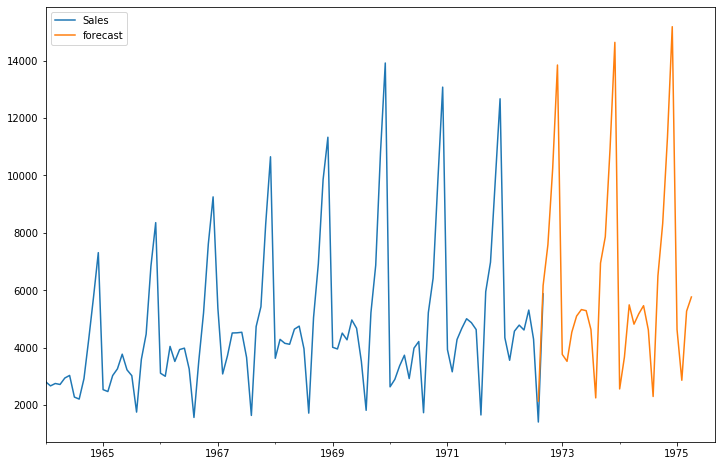

In [58]:
future_df[['Sales','forecast']].plot(figsize=(12,8))